# Part I - Loan Data Visualization
## by Geoffrey Mosongo

## Introduction
* Prosper loan dataset contains 113,937 loans with 81 variables on each loan. Some of the variables include loan amount, borrower rate (or interest rate), current loan status, borrower income, among others.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset using pandas
df_loan = pd.read_csv('ProsperLoanData.csv')

In [3]:
# determine the shape of the dataframe
df_loan.shape

(113937, 81)

In [4]:
#enumerate a few columns of the dataset
df_loan.iloc[2:5]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

The dataset has 81 columns. however, not all are of interest and as susch, the columns related to analysis and exploration of the loans will be selected. 

About 15 columns relating to the amount of loan, dates, rates and other charactrestics about the borrowers will be selected.

In [6]:
df_loan.columns.values.tolist()

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (p

In [7]:
# selection of columns related to loan analysis
df = df_loan[[  'LoanKey', 
                'LoanOriginationDate', 
                'ClosedDate', 
                'LoanStatus', 
                'Term', 
                'LoanOriginalAmount', 
                'MonthlyLoanPayment',
                'ListingCategory (numeric)', 
                'BorrowerAPR', 
                'BorrowerRate',
                'CreditGrade', 
                'ProsperRating (Alpha)', 
                'CreditScoreRangeLower', 
                'CreditScoreRangeUpper',
                'IncomeRange', 
                'IncomeVerifiable', 
                'StatedMonthlyIncome', 
                'DebtToIncomeRatio', 
                'EmploymentStatus',
                'IsBorrowerHomeowner']]

In [8]:
#dataset shape
df.shape

(113937, 20)

In [9]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
LoanKey                      113937 non-null object
LoanOriginationDate          113937 non-null object
ClosedDate                   55089 non-null object
LoanStatus                   113937 non-null object
Term                         113937 non-null int64
LoanOriginalAmount           113937 non-null int64
MonthlyLoanPayment           113937 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
CreditGrade                  28953 non-null object
ProsperRating (Alpha)        84853 non-null object
CreditScoreRangeLower        113346 non-null float64
CreditScoreRangeUpper        113346 non-null float64
IncomeRange                  113937 non-null object
IncomeVerifiable             113937 non-null bool
StatedMonthlyIncome          113937 non-null float64
DebtToI

### From the data dictionary, the columns selected are explained as below

* **CreditGrade**	The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.

* **Term**	The length of the loan expressed in months.

* **LoanStatus**	The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, 

* **PastDue** The PastDue status will be accompanied by a delinquency bucket.

* **ClosedDate** Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses.

* **BorrowerAPR** The Borrower's Annual Percentage Rate (APR) for the loan.

* **BorrowerRate** The Borrower's interest rate for this loan

* **ProsperRating (Alpha)**	The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.

* **ProsperScore**	A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.

* **ListingCategory**	The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

* **EmploymentStatus**	The employment status of the borrower at the time they posted the listing.

* **IsBorrowerHomeowner**	A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

* **CreditScoreRangeLower**	The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

* **CreditScoreRangeUpper**	The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

* **DebtToIncomeRatio**	The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

* **IncomeRange**	The income range of the borrower at the time the listing was created.

* **IncomeVerifiable**	The borrower indicated they have the required documentation to support their income.

* **LoanOriginalAmount**	The origination amount of the loan.

* **LoanOriginationDate**	The date the loan was originated.

* **MonthlyLoanPayment**	The scheduled monthly loan payment.

* **LoanKey**	Unique key for each loan. This is the same key that is used in the API.


In [10]:
#summary statistics
df.describe()

,Term,LoanOriginalAmount,MonthlyLoanPayment,ListingCategory (numeric),BorrowerAPR,BorrowerRate,CreditScoreRangeLower,CreditScoreRangeUpper,StatedMonthlyIncome,DebtToIncomeRatio
count,113937.000000,113937.00000,113937.000000,113937.000000,113912.000000,113937.000000,113346.000000,113346.000000,1.139370e+05,105383.000000
mean,40.830248,8337.01385,272.475783,2.774209,0.218828,0.192764,685.567731,704.567731,5.608026e+03,0.275947
std,10.436212,6245.80058,192.697812,3.996797,0.080364,0.074818,66.458275,66.458275,7.478497e+03,0.551759
min,12.000000,1000.00000,0.000000,0.000000,0.006530,0.000000,0.000000,19.000000,0.000000e+00,0.000000
25%,36.000000,4000.00000,131.620000,1.000000,0.156290,0.134000,660.000000,679.000000,3.200333e+03,0.140000
50%,36.000000,6500.00000,217.740000,1.000000,0.209760,0.184000,680.000000,699.000000,4.666667e+03,0.220000
75%,36.000000,12000.00000,371.580000,3.000000,0.283810,0.250000,720.000000,739.000000,6.825000e+03,0.320000
max,60.000000,35000.00000,2251.510000,20.000000,0.512290,0.497500,880.000000,899.000000,1.750003e+06,10.010000


In [49]:
#Change data types in the date columns
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 20 columns):
LoanKey                      113066 non-null object
LoanOriginationDate          113066 non-null datetime64[ns]
ClosedDate                   55076 non-null datetime64[ns]
LoanStatus                   113066 non-null category
Term                         113066 non-null int64
LoanOriginalAmount           113066 non-null int64
MonthlyLoanPayment           113066 non-null float64
ListingCategory (numeric)    113066 non-null category
BorrowerAPR                  113041 non-null float64
BorrowerRate                 113066 non-null float64
CreditGrade                  28953 non-null category
ProsperRating (Alpha)        83982 non-null category
CreditScoreRangeLower        112475 non-null float64
CreditScoreRangeUpper        112475 non-null float64
IncomeRange                  112445 non-null category
IncomeVerifiable             113066 non-null bool
StatedMonthlyIncome          1130

In [12]:
#check for duplicate entries
df.duplicated().sum()

871

In [50]:
#Drop duplicate entries and confirm if true
df.drop_duplicates(inplace=True)
df[df.duplicated() == True].count()

LoanKey                      0
LoanOriginationDate          0
ClosedDate                   0
LoanStatus                   0
Term                         0
LoanOriginalAmount           0
MonthlyLoanPayment           0
ListingCategory (numeric)    0
BorrowerAPR                  0
BorrowerRate                 0
CreditGrade                  0
ProsperRating (Alpha)        0
CreditScoreRangeLower        0
CreditScoreRangeUpper        0
IncomeRange                  0
IncomeVerifiable             0
StatedMonthlyIncome          0
DebtToIncomeRatio            0
EmploymentStatus             0
IsBorrowerHomeowner          0
dtype: int64

In [14]:
#check for null values
df.isnull().sum()

LoanKey                          0
LoanOriginationDate              0
ClosedDate                   57990
LoanStatus                       0
Term                             0
LoanOriginalAmount               0
MonthlyLoanPayment               0
ListingCategory (numeric)        0
BorrowerAPR                     25
BorrowerRate                     0
CreditGrade                  84113
ProsperRating (Alpha)        29084
CreditScoreRangeLower          591
CreditScoreRangeUpper          591
IncomeRange                      0
IncomeVerifiable                 0
StatedMonthlyIncome              0
DebtToIncomeRatio             8472
EmploymentStatus              2255
IsBorrowerHomeowner              0
dtype: int64

In [15]:
#adjust data type for categorical columns
df = df.astype({"LoanStatus":"category","ListingCategory (numeric)":"category","EmploymentStatus":"category"})

In [16]:
# Create ordered categorical values for columns CreditGrade, ProsperRating (Alpha) and IncomeRange
var_dict = {'CreditGrade': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'],
           'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'],
           'IncomeRange': ['Not displayed', 'Not employed', '$1-24,999', 
                           '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}
for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories = var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 20 columns):
LoanKey                      113066 non-null object
LoanOriginationDate          113066 non-null datetime64[ns]
ClosedDate                   55076 non-null datetime64[ns]
LoanStatus                   113066 non-null category
Term                         113066 non-null int64
LoanOriginalAmount           113066 non-null int64
MonthlyLoanPayment           113066 non-null float64
ListingCategory (numeric)    113066 non-null category
BorrowerAPR                  113041 non-null float64
BorrowerRate                 113066 non-null float64
CreditGrade                  28953 non-null category
ProsperRating (Alpha)        83982 non-null category
CreditScoreRangeLower        112475 non-null float64
CreditScoreRangeUpper        112475 non-null float64
IncomeRange                  112445 non-null category
IncomeVerifiable             113066 non-null bool
StatedMonthlyIncome          1130

### What is the structure of your dataset?
The dataset contains 113,937 loan entries with 81 columns. There are 871 duplicate entries in the data set. For anlaysis puprposes, relevant columns have been selected accordingly. A number of columns are numeric but while others have categorical variables(both ordinal and nominal) and datetime variables.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest to determine the credit score of the borrower will be of interst. These include the interest rate of the loan, its amount, and the credit rating of the borrower.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The interesting features for loan dispatch include parameters such as loan amount, the date when the loan was taken, the term of the loan, the status of the loan. The loanee features such as the income, the employment and housing situation and debt to income ratio also come into play.

## Univariate Exploration

 In this section, the investigation is based on distributions of individual variables. 


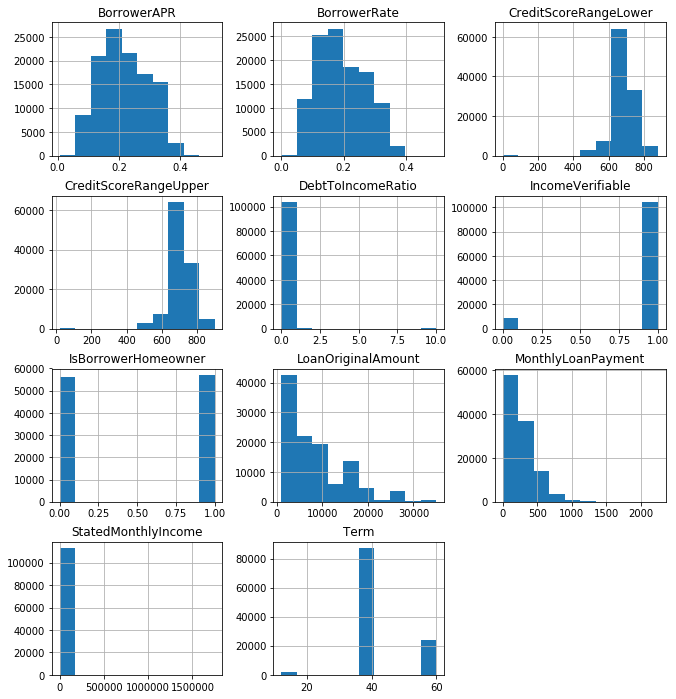

In [18]:
#plot histograms for all the variables
df.hist(figsize=(11,12));

**Loan Original Amount Analysis**

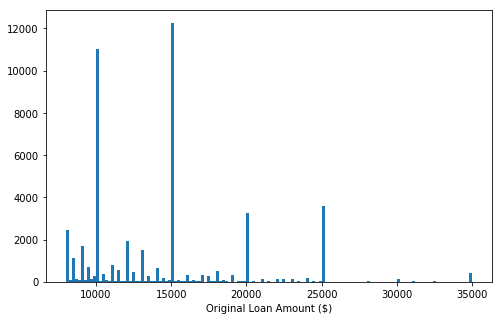

In [19]:
#Enumerate Loan Original Amount
bins = np.arange(8000, df.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original Loan Amount ($)');

There are noticeable escalations in frequency are at 10,000, 15,000, 20,000, 25,000 and 35,000.

**Montly Loan Payment Distributions**

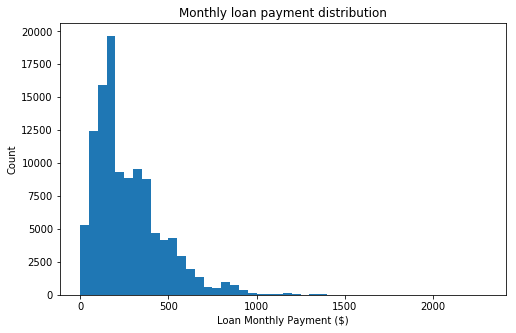

In [20]:
##Monthly payment distributions
binsize = 50
bins = np.arange(0, df['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Loan Monthly Payment ($)')
plt.ylabel('Count')
plt.title('Monthly loan payment distribution')
plt.show()

Since the plot is skewed to the right, the log scale can be used to visualize the long tail

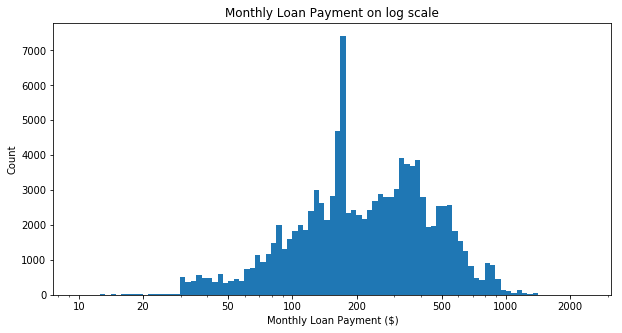

In [21]:
# Log scale usage for plot visualization
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(df['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('Count')
plt.title('Monthly Loan Payment on log scale')
plt.show()

* The distribution is normal with the peaks between 100 and 200 and some step up at the 500 mark

**Loan Origination Year**

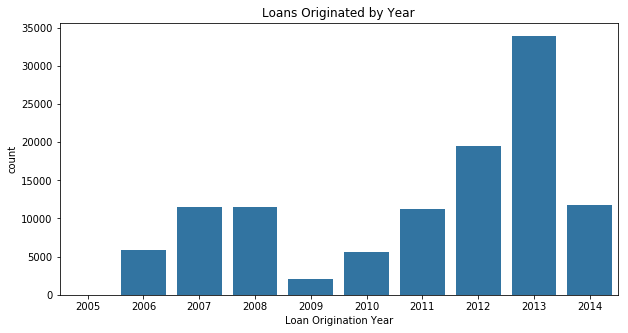

In [22]:
# Loan Origination by Year
base_color = sb.color_palette()[0]
plt.figure(figsize=[10, 5])
sb.countplot(data=df,x=df['LoanOriginationDate'].dt.year, color= base_color)
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year');

In [23]:
# Confirm number of loans for year 2005
df[df.LoanOriginationDate.dt.year == 2005].count()['LoanOriginationDate']

22

There were 22 loans granted in 2005, the year when Prosper started business. According to Wikipedia, they stopped their business between Nov 2008 - July 2009 explaining why the number of loans given out decreased during this period.

The number of new loans increased from 2010 with 2013 recoring the highest number.

**Loan Terms (Months)**

In [24]:
#Confirmation of loan terms
df['Term'].value_counts()

36    87224
60    24228
12     1614
Name: Term, dtype: int64

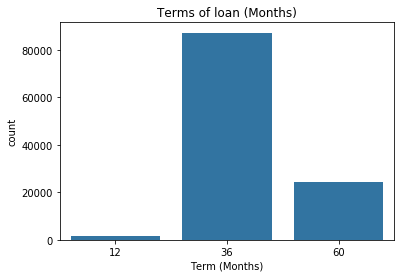

In [25]:
#plot for loan terms
base_color = sb.color_palette()[0]
sb.countplot(data=df,x= 'Term',color=base_color);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

Most of the loans have a repayment period of 36 moths (3 years) while a few loans have a repayment period of one year (12 months)

**Borrower Income Range**

Text(0.5,1,'Borrower Income Range Distribution')

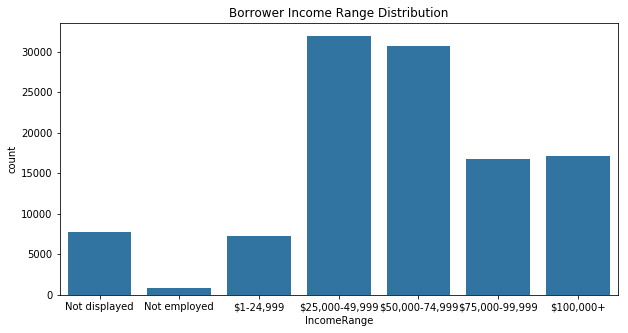

In [26]:
#plot for income range distribution
plt.figure(figsize=[10, 5])
sb.countplot(data=df,x='IncomeRange',color=base_color);
plt.title('Borrower Income Range Distribution')

People whose income ranges from 25,000- 49,999 are the ones who are taking most loans

**Loan Original Amount**

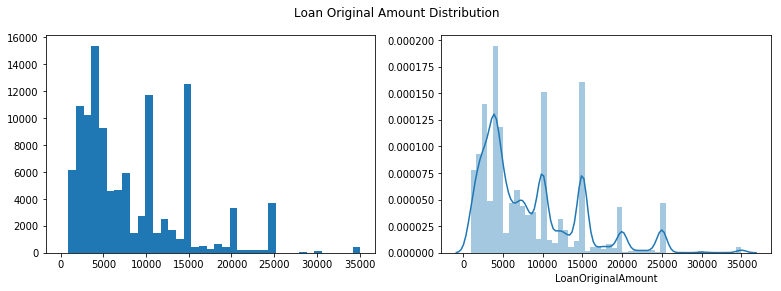

In [27]:
#plot for loan original amount
plt.figure(figsize=(13,4))
plt.suptitle('Loan Original Amount Distribution')
plt.subplot(1,2,1)
bins = np.arange(0, df['LoanOriginalAmount'].max()+900, 900)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)

plt.subplot(1,2,2)
sb.distplot(df['LoanOriginalAmount']);

In [28]:
#top 5 loan amounts per frequency
df.LoanOriginalAmount.value_counts().nlargest(5)

4000     14207
15000    12232
10000    10956
5000      6953
2000      6042
Name: LoanOriginalAmount, dtype: int64

* Loan amounts are right skewed with several peaks as shown in the histogram above.

* The most frequently loaned amount is $4000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* The visuals for loan original amount distribution is right skewed.Monthly Loan Repayment was converted to log scale to better understand the patterns.

* Year 2013 had the highest loans dispensed, while year 2009 had the least amounts dispensed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* Stated moonthly income is skewed to the right. Majority of monthly stated income is less than 30,000 USD while some borrowres have declared 100,000 USD and above

* The number of income ranges was reduced by one by merging USD 0 with Not Employed into the same category.


## Bivariate Exploration

In this section, we investigate relationships between pairs of variables in your the
data.The variables have been introduced earlier in the notebook.

In [29]:
#Define numerical and categorical vriables
numerical_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
categorical_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus']
bool_vars = ['LoanStatus', 'IncomeVerifiable', 'IsBorrowerHomeowner']

##  Plots for Numerical Data Analysis

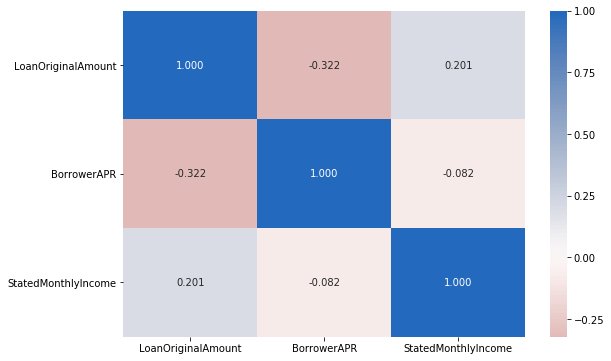

In [30]:
# correlation plot
plt.figure(figsize = [9, 6])
sb.heatmap(df[numerical_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

* The correlation coefficient of borrower APR and loan original amount is -0.323, implying that the more the loan amount, the lower the APR.

* The loan original amount is positively correlated with the stated monthly income, indicating that borrowers who earn more per month contend with more loan amounts.

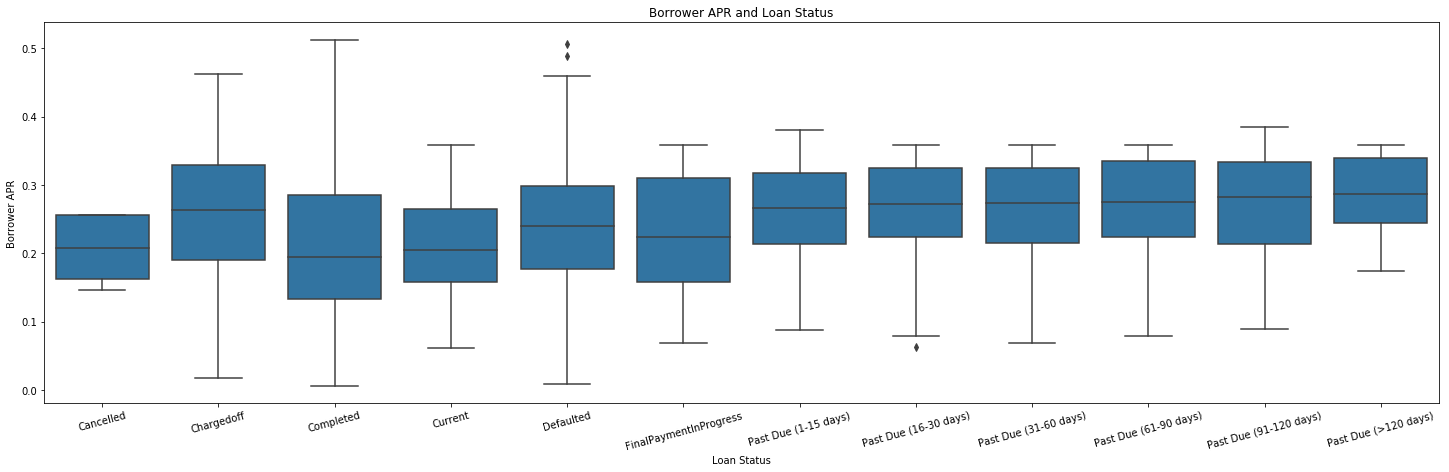

In [31]:
# Comparing Borrower APR vs Status of Loan 
plt.figure(figsize = [25, 7])
sb.boxplot(data=df,y='BorrowerAPR',x='LoanStatus',color=base_color);
plt.title('Borrower APR and Loan Status');
plt.ylabel('Borrower APR');
plt.xlabel('Loan Status');
plt.xticks(rotation=15);

* It is adduced that the BorrowerAPR vs LoanStatus graph that Current and completed loans have lower rate than the past-due loans.

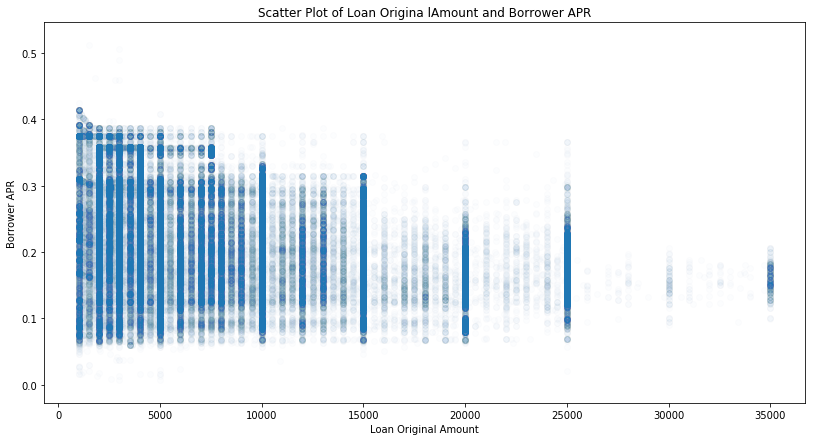

In [40]:
#Scatter plot for Loan Original Amount and Borrower APR
plt.figure(figsize = [30, 7]) 
plt.subplot(1, 2, 1)
plt.scatter(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR',  alpha =  0.01)
plt.title('Scatter Plot of Loan Origina lAmount and Borrower APR')
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR');

* There's a negative relationship between Lan Oiginal Aount and Brrower APR, meaning that big loans have less annual interest.

**The following section will examine relationships between categorical variables**

## Analysis of Categorical Variables

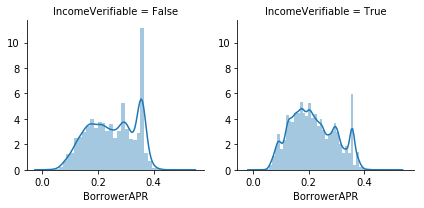

In [41]:
#Plots for verifiable income
g = sb.FacetGrid(data = df, col = 'IncomeVerifiable')
g.map(sb.distplot, 'BorrowerAPR');

* From the above plots, it is evident that borrowers with verifiable income are entitled to lower rates

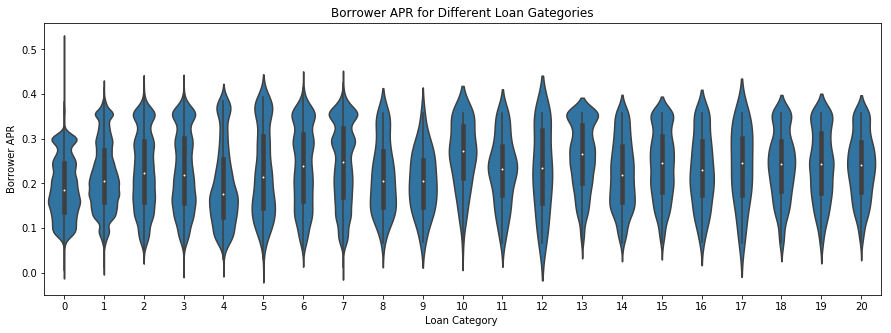

In [43]:
# violin plot for loan category and borrower APR 
plt.figure(figsize = [15, 5])
sb.violinplot(data=df,x='ListingCategory (numeric)', y='BorrowerAPR',color=base_color);
plt.title('Borrower APR for Different Loan Gategories')
plt.xlabel('Loan Category ');
plt.ylabel('Borrower APR');

> From the Data Dictionary, the Listing Category are as follows:  

* 0 - Not Available

* 1 - Debt Consolidation

* 2 - Home Improvement

* 3 - Business

* 4 - Personal Loan

* 5 - Student Use

* 6 - Auto

* 7- Other

* 8 - Baby&Adoption

* 9 - Boat

* 10 - Cosmetic Procedure

* 11 - Engagement Ring

* 12 - Green Loans

* 13 - Household Expenses

* 14 - Large Purchases

* 15 - Medical/Dental

* 16 - Motorcycle

* 17 - RV

* 18 - Taxes

* 19 - Vacation

* 20 - Wedding Loans

> We can see that baby and adoption loans have lower interest rates with data distributed eavenly.

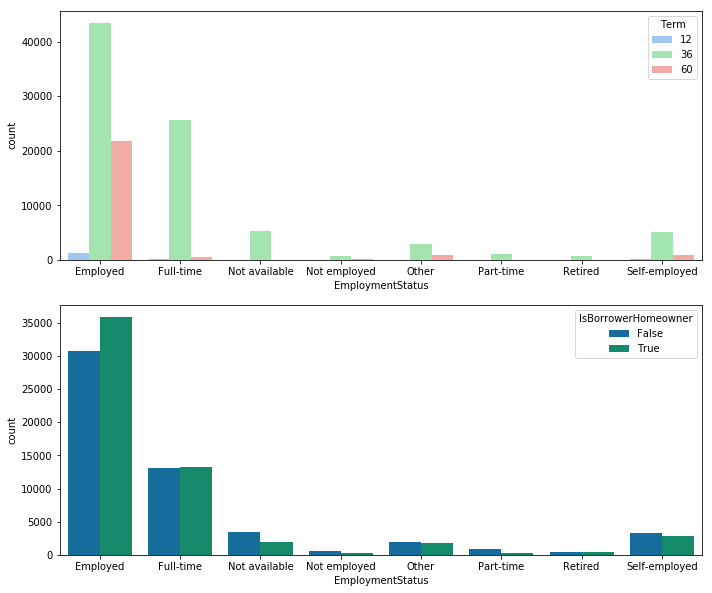

In [46]:
# plot for home owners and terms vs enploymnet status
plt.figure(figsize = [10,12])

plt.subplot(3,1,1)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'Term', palette = 'pastel')

plt.subplot(3,1,2)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner', palette = 'colorblind')

plt.tight_layout();

From the above plots;

* Term 60 is more common for employed borrowers than other groups
* Most of the employed borrowers own homes

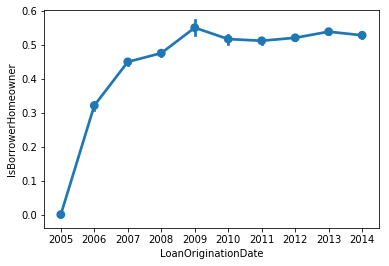

In [48]:
#pointplot for loan origination year
sb.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'IsBorrowerHomeowner');

From the point plot, the number of home owners stabilized from year 2010

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* The more the loan amount, the lower the APR. This indicates a negative correlation.
* High risk borrowers get loans for much lower amounts than medium or low risk borrowers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Higher amounts are borrowed by those that earn more.
* Home owners borrow higher amounts 
* Unemployed borrowers pay the highest interest rates
* Huge loan amounts are borrowed for longer periods

## Multivariate Exploration

This section will build on previous section findings and combine multiple variables to see how they relate.


## How Does Prosper Rating (Alpha) Affect Borrowing?

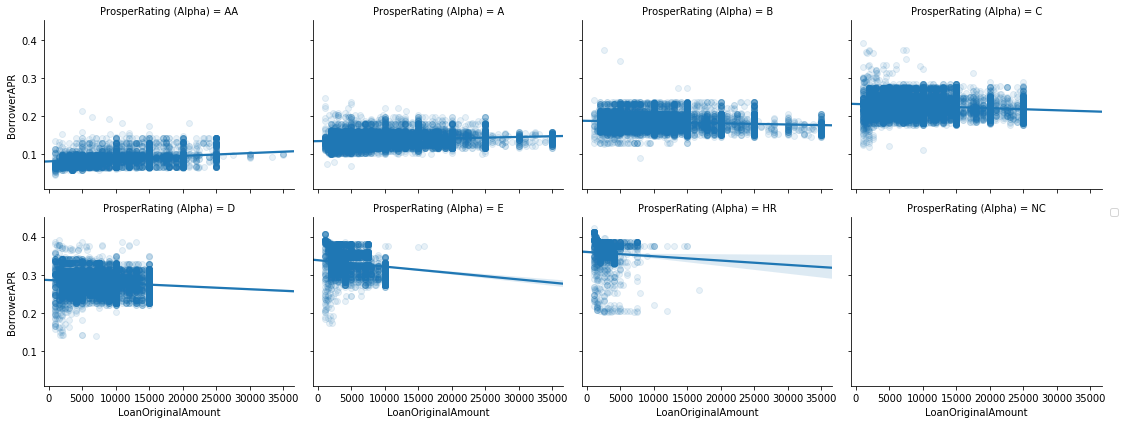

In [54]:
# Effect of Prosper rating on APR and Loan Amount
g=sb.FacetGrid(data=df, aspect=1.3, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

* With a better rating, the loan disbursed increases. 

* A better rating leads to a decrease in the borrower APR decreases.

* People with lower ratings tend to borrow less money, decreasing APR could encourage them to increase borrowing.

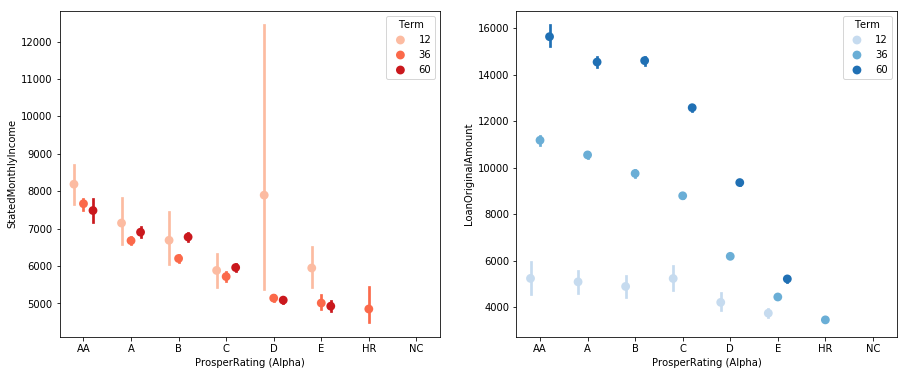

In [59]:
# Plot for Prosper Rating and Stated Monthly income
fig, ax = plt.subplots(ncols=2, figsize=[15,6])
sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Reds', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[1]);

* There's no relation between term and rating for stated monthly income

* For loan amount, there exists a relationship between term and rating. With better Prosper rating, the loan amount of all three terms increases.

## How Does Home Ownership Affect Borrowing

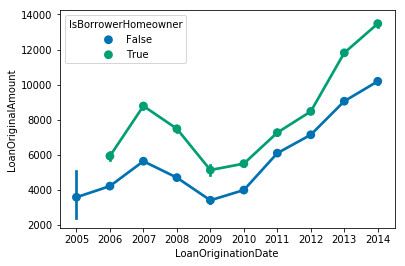

In [64]:
#plot for home ownership, loan original amount and loan origination date
sb.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner', 
             palette = 'colorblind');

* Home owners borrow more money on average for all the years analysed.

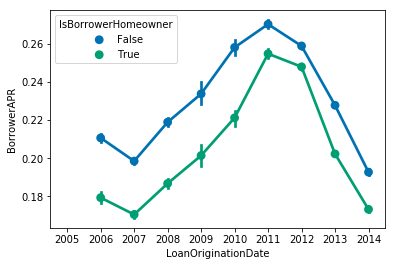

In [67]:
# ARR Ratings
sb.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'BorrowerAPR', hue = 'IsBorrowerHomeowner',
             palette = 'colorblind');

* Borrowers withoutt home ownership pay higher interst rates. This could be attributed to lack of security

## Does APR and Loan Original Amount Determine Interest Rates?

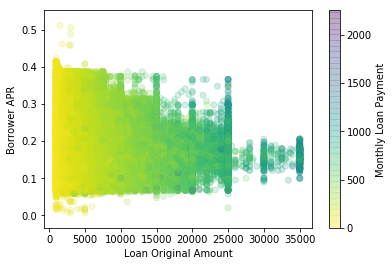

In [72]:
#scatter plot for Borrower APR and Loan Original Amount
plt.scatter(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 1/5, c = 'MonthlyLoanPayment', 
            cmap = 'viridis_r')
plt.colorbar(label = 'Monthly Loan Payment')
plt.ylabel('Borrower APR')
plt.xlabel('Loan Original Amount')
plt.show()

* Higher loan amounts attract lower interst rates but with higher monthly installments

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We see that Employed people are diverse regarding the Loan Status and BorrowerAPR as they have sometimes high borrower rate like in chargeoff and sometimes low borrower rate like in the past dues.

* Full-Time and part-time employees have a lower BorrowerAPR for all loan categories.

* Self-employed and Not-employed individuals have a higer BorrowerAPR

* Borrowers with home ownership and a higher income, enjoyed better loan rates


### Were there any interesting or surprising interactions between features?

* From the Scatter plots, it was evident that ProsperScore and BorrowerAPR were negatively correlated. The higher the prosper score, the lower the risk.


## Conclusions

* Full-Time and part-time employees have a lower BorrowerAPR for all loan categories.

* Self-employed and Not-employed individuals have a higer BorrowerAPR

* Borrowers with home ownership and a higher income, enjoyed better loan rates

* Borrowers withoutt home ownership pay higher interst rates. This could be attributed to lack of security

## References

* Udacity Classroom Notes
* https://github.com/yduan004/communicate-data-loan-data-from-Prosper
* https://www.kaggle.com/code/omarelsherif010/loan-data-visualization-data-analysis-easy/notebook?scriptVersionId=49667904
* https://github.com/jovanmedfordDataScientist/loan-data-from-prosper
* https://janamalesova.github.io/Udacity-Data-Analyst-Nanodegree/P4/exploration_ProsperLoans.html